In [1]:
!pip install torch>=1.2.0 
# Install torch
!pip install torchaudio 
# Install torchaudio
%matplotlib inline
# Sets the backend of matplotlib to the ’inline’backend
!pip install librosa
# Install librosa

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [5]:
# the following codes are the answer of Q1
import librosa
from scipy.io.wavfile import write as write_wav
fs = 16000
x, _ = librosa.load("./myspeech.m4a", sr=fs)
write_wav("./myspeech.wav", fs, x)

C:\Users\33554\AppData\Local\Temp\ipykernel_3980\2432967628.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  x, _ = librosa.load("./myspeech.m4a", sr=fs)
C:\Users\33554\AppData\Roaming\Python\Python312\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


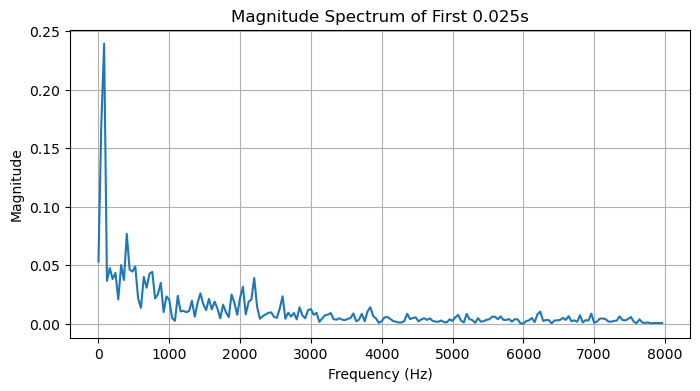

In [7]:
# the following codes are the answer of Q2
import numpy as np
import librosa
import matplotlib.pyplot as plt

# 加载音频
fs = 16000  # 采样率
x, _ = librosa.load("./myspeech.wav", sr=fs)

# 取前 0.025 秒（400 个样本）
n_samples = int(0.025 * fs)  # 0.025 s * 16 kHz = 400
x_short = x[:n_samples]

# 计算 FFT 幅度谱
N = len(x_short)  # FFT 点数 = 样本数
X = np.fft.fft(x_short)
X_mag = np.abs(X)[:N//2]  # 只取前半部分（正频率）

# 计算对应频率轴
freqs = np.fft.fftfreq(N, d=1/fs)[:N//2]

# 绘制幅度谱
plt.figure(figsize=(8,4))
plt.plot(freqs, X_mag)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum of First 0.025s")
plt.grid(True)
plt.show()

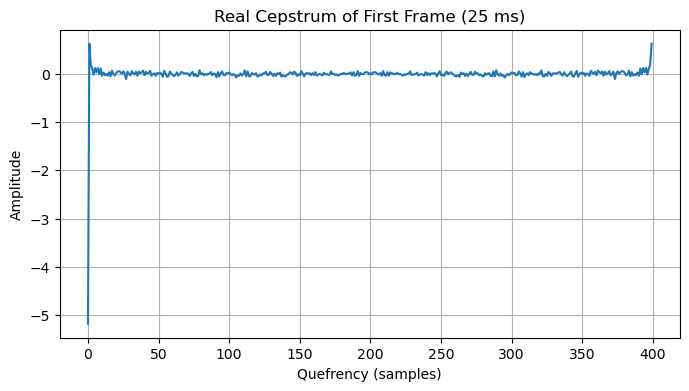

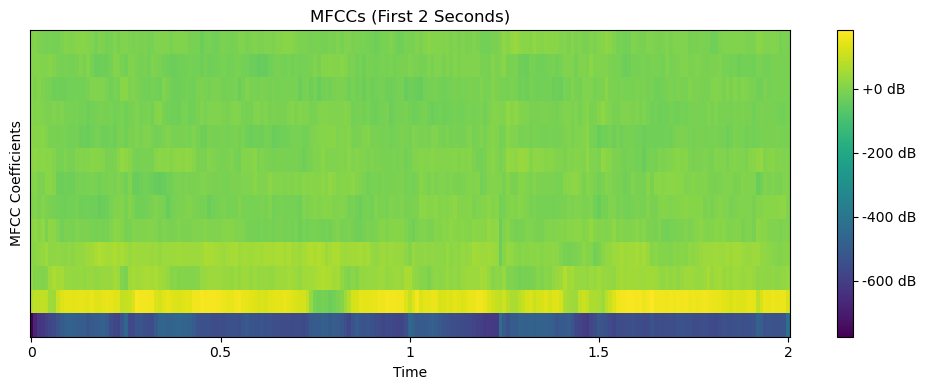

In [9]:
# the following codes are the answer of Q3
# FFT -> log magnitude -> IFFT -> real cepstrum
log_mag = np.log(np.abs(X) + 1e-10)  # 避免 log(0)
cepstrum = np.fft.ifft(log_mag).real

# 绘制实倒谱
plt.figure(figsize=(8,4))
plt.plot(cepstrum)
plt.xlabel("Quefrency (samples)")
plt.ylabel("Amplitude")
plt.title("Real Cepstrum of First Frame (25 ms)")
plt.grid(True)
plt.show()

# Step 2: 提取 MFCCs (前 2 秒)
frame_size = int(0.025 * fs)  # 25 ms
hop_length = int(0.010 * fs)  # 10 ms

mfccs = librosa.feature.mfcc(
    y=x[:2*fs],           # 前 2 秒
    sr=fs,
    n_mfcc=13,
    n_fft=frame_size,
    hop_length=hop_length
)

# 绘制 MFCCs
plt.figure(figsize=(10,4))
librosa.display.specshow(
    mfccs,
    x_axis='time',
    sr=fs,
    hop_length=hop_length,
    cmap='viridis'
)
plt.colorbar(format='%+2.0f dB')
plt.ylabel('MFCC Coefficients')
plt.title('MFCCs (First 2 Seconds)')
plt.tight_layout()
plt.show()

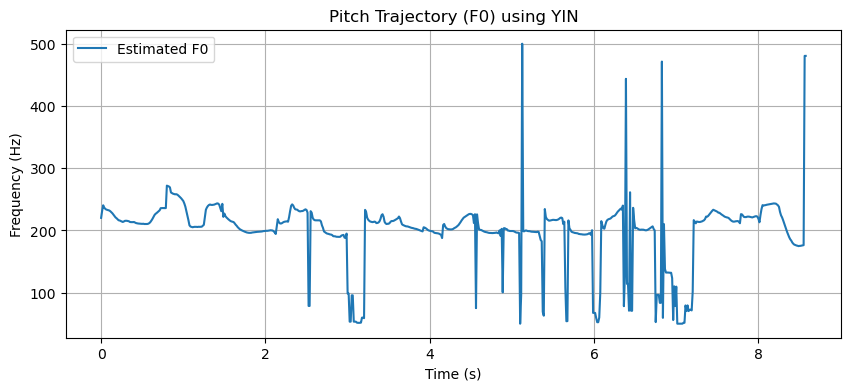

In [11]:
# the following codes are the answer of Q4
#提取基频 F0（YIN 算法）
hop_length = 200  # 帧移
f0 = librosa.yin(
    x,
    fmin=50,     # 最低基频，50 Hz
    fmax=500,    # 最高基频，500 Hz
    sr=fs,
    hop_length=hop_length
)

# 对应时间轴
times = librosa.frames_to_time(np.arange(len(f0)), sr=fs, hop_length=hop_length)

# Step 2: 绘制 F0 轨迹
plt.figure(figsize=(10,4))
plt.plot(times, f0, label='Estimated F0')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Pitch Trajectory (F0) using YIN")
plt.grid(True)
plt.legend()
plt.show()

In [17]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


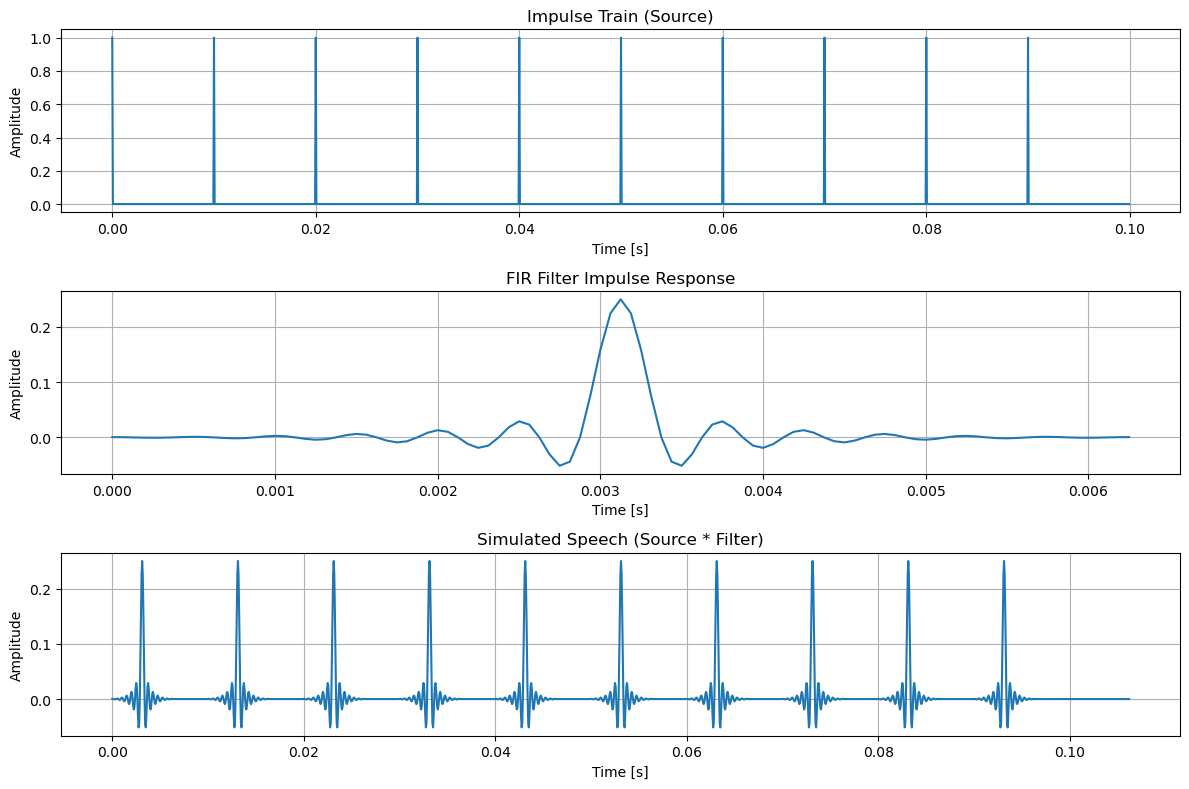

In [21]:
# the following codes are the answer of Q5
from scipy.signal import firwin, lfilter, convolve

#参数
fs = 16000          # 采样率
f0 = 100            # 脉冲频率（100 Hz）
duration = 0.1      # 持续时间 0.1 s
t = np.arange(0, duration, 1/fs)

#生成周期脉冲序列（源）
source = np.zeros_like(t)
period_samples = int(fs / f0)
source[::period_samples] = 1.0  # 每 period_samples 个样本放一个脉冲

# 设计 FIR 滤波器（低通滤波器）
num_taps = 101  # FIR 滤波器长度
cutoff = 2000   # 截止频率 2 kHz
fir_filter = firwin(num_taps, cutoff, fs=fs, pass_zero='lowpass')

# 卷积得到模拟语音
simulated_speech = convolve(source, fir_filter, mode='full')

#绘制
plt.figure(figsize=(12,8))

# 脉冲序列
plt.subplot(3,1,1)
plt.plot(t, source)
plt.title("Impulse Train (Source)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

# FIR 滤波器冲激响应
plt.subplot(3,1,2)
plt.plot(np.arange(num_taps)/fs, fir_filter)
plt.title("FIR Filter Impulse Response")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

# 卷积后的信号
plt.subplot(3,1,3)
t_conv = np.arange(len(simulated_speech)) / fs
plt.plot(t_conv, simulated_speech)
plt.title("Simulated Speech (Source * Filter)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()